In [ ]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.signal import resample

# Constants
ROOT = '/content/drive/MyDrive/Room2_npy'
TARGET_TIMESTEPS = 1000  # downsample from 10,000 → 1000
N_FEATURES = 90

X_list = []
y_list = []
activities = sorted(os.listdir(ROOT))
label_encoder = LabelEncoder()
label_encoder.fit(activities)

for activity in activities:
    activity_path = os.path.join(ROOT, activity)
    for file in os.listdir(activity_path):
        if file.endswith('.npy'):
            try:
                data_path = os.path.join(activity_path, file)
                csi = np.load(data_path)  # shape (10000, 90), complex
                if csi.shape[0] < 1000:
                    continue  # skip too short
                # Convert to magnitude
                csi_magnitude = np.abs(csi)
                # Resample to TARGET_TIMESTEPS
                csi_resampled = resample(csi_magnitude, TARGET_TIMESTEPS)
                # Normalize per-sample
                mean = np.mean(csi_resampled, axis=0)
                std = np.std(csi_resampled, axis=0) + 1e-6
                csi_norm = (csi_resampled - mean) / std
                X_list.append(csi_norm)
                y_list.append(activity)
            except Exception as e:
                print(f"Error in {file}: {e}")

# Convert to arrays
X = np.array(X_list)  # shape: (samples, timesteps, features)
y = label_encoder.transform(y_list)

# Check results
print(f"Final shape: X={X.shape}, y={y.shape}")
print(f"Classes: {label_encoder.classes_}")


Final shape: X=(114, 1000, 90), y=(114,)
Classes: ['kneel' 'liedown' 'pickup' 'sit' 'sitrotate' 'stand' 'standrotate' 'walk']


In [ ]:
pip install keras-tcn

/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.0386 - loss: 51.5743

9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 604ms/step - accuracy: 0.0417 - loss: 49.5913 - val_accuracy: 0.0526 - val_loss: 5.8716
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.1588 - loss: 8.9055

9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 711ms/step - accuracy: 0.1540 - loss: 8.7963 - val_accuracy: 0.1053 - val_loss: 2.8008
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 460ms/step - accuracy: 0.1760 - loss: 4.3130 - val_accuracy: 0.0526 - val_loss: 2.3493
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 707ms/step - accuracy: 0.1760 - loss: 3.0017 - val_accuracy: 0.0000e+00 - val_loss: 2.1346
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.2593 - loss: 2.9365

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - accuracy: 0.2583 - loss: 2.9380 - val_accuracy: 0.2105 - val_loss: 1.8253
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.3040 - loss: 2.2567

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 519ms/step - accuracy: 0.2972 - loss: 2.2666 - val_accuracy: 0.2632 - val_loss: 1.6883
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - accuracy: 0.3089 - loss: 2.0714 - val_accuracy: 0.2632 - val_loss: 1.6644
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 466ms/step - accuracy: 0.3641 - loss: 2.0235 - val_accuracy: 0.2632 - val_loss: 1.6789
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.4404 - loss: 1.9805

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.4436 - loss: 1.9530 - val_accuracy: 0.3158 - val_loss: 1.6894
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.3110 - loss: 2.0253

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - accuracy: 0.3090 - loss: 2.0198 - val_accuracy: 0.4211 - val_loss: 1.6649
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 633ms/step - accuracy: 0.4485 - loss: 1.8708 - val_accuracy: 0.3158 - val_loss: 1.6093
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 510ms/step - accuracy: 0.3744 - loss: 1.7283 - val_accuracy: 0.3158 - val_loss: 1.6402
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.3813 - loss: 1.7249 - val_accuracy: 0.3684 - val_loss: 1.6486
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 455ms/step - accuracy: 0.4560 - loss: 1.5595 - val_accuracy: 0.4211 - val_loss: 1.5604
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.4103 - loss: 1.6776 - val_accuracy: 0.4211 - val_loss: 1.5222
Epoch 16/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 472ms/step - accuracy: 0.4587 - loss: 1.4919 - val_accuracy: 0.3684 - val_loss: 1.5454
Epoch 17/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.6188 - loss: 1.2075

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 709ms/step - accuracy: 0.6097 - loss: 1.2182 - val_accuracy: 0.4737 - val_loss: 1.5299
Epoch 18/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 518ms/step - accuracy: 0.4819 - loss: 1.2185 - val_accuracy: 0.4211 - val_loss: 1.4953
Epoch 19/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 706ms/step - accuracy: 0.6037 - loss: 0.9665 - val_accuracy: 0.4211 - val_loss: 1.4556
Epoch 20/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5466 - loss: 1.1982

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step - accuracy: 0.5488 - loss: 1.1990 - val_accuracy: 0.5789 - val_loss: 1.3977
Epoch 21/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 754ms/step - accuracy: 0.5612 - loss: 1.2066 - val_accuracy: 0.4211 - val_loss: 1.4552
Epoch 22/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 505ms/step - accuracy: 0.5457 - loss: 1.2608 - val_accuracy: 0.3684 - val_loss: 1.4788
Epoch 23/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 710ms/step - accuracy: 0.5860 - loss: 1.2396 - val_accuracy: 0.5789 - val_loss: 1.4260
Epoch 24/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - accuracy: 0.6387 - loss: 0.9618 - val_accuracy: 0.5263 - val_loss: 1.3676
Epoch 25/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.6118 - loss: 1.0620 - val_accuracy: 0.5263 - val_loss: 1.3508
Epoch 26/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 466ms/step - accuracy: 0.7266 - loss: 0.7806 - val_accuracy: 0.5789 - val_loss: 1.2732
Epoch 27/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 683ms/step - accuracy: 0.6548 - loss: 0.9895 - val_accuracy: 0.5263 - val_lo

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 477ms/step - accuracy: 0.6938 - loss: 0.8545 - val_accuracy: 0.6316 - val_loss: 1.2257
Epoch 29/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step - accuracy: 0.7019 - loss: 0.8919 - val_accuracy: 0.6316 - val_loss: 1.2430
Epoch 30/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 529ms/step - accuracy: 0.7361 - loss: 0.7735 - val_accuracy: 0.6316 - val_loss: 1.2338
Epoch 31/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 610ms/step - accuracy: 0.6894 - loss: 0.9861 - val_accuracy: 0.6316 - val_loss: 1.2321
Epoch 32/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.8007 - loss: 0.5943 - val_accuracy: 0.5263 - val_loss: 1.3926
Epoch 33/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 573ms/step - accuracy: 0.6850 - loss: 0.9077 - val_accuracy: 0.5263 - val_loss: 1.3840
Epoch 34/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 533ms/step - accuracy: 0.6815 - loss: 0.8118 - val_accuracy: 0.5789 - val_loss: 1.2524
Epoch 35/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - accuracy: 0.6516 - loss: 0.8488 - val_accuracy: 0.6316 - val_lo

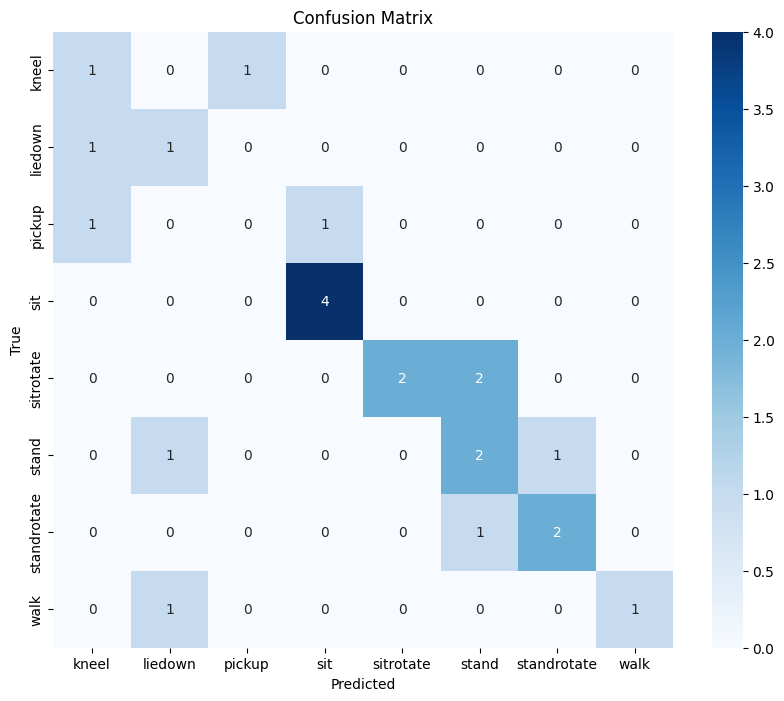

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
from tcn import TCN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encode labels
y_cat = to_categorical(y, num_classes=8)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# TCN Model
model = Sequential([
    TCN(input_shape=(1000, 90), nb_filters=64, kernel_size=6, dropout_rate=0.2),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')  # 8 activities
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_tcn_model.h5', save_best_only=True, monitor='val_accuracy')
]

# Training
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=callbacks,
    verbose=1
)

# Evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Validation f1 Score: {acc:.4f}")

# Predict & Report
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)
y_true_labels = y_test.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_true_labels, y_pred_labels),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


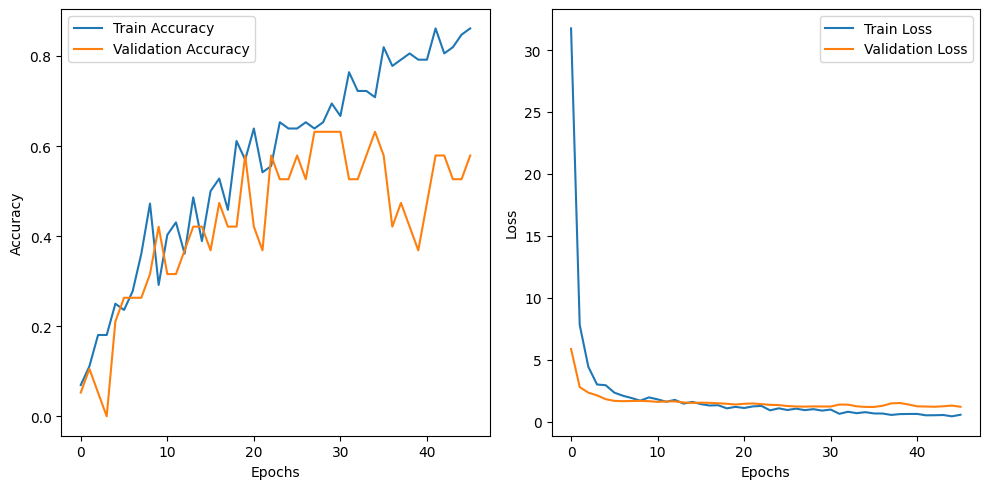

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()